<a href="https://colab.research.google.com/github/manurockz/NNDL/blob/main/MINI_BATCH_GRADIENT_DESCENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
# MINI BATCH GRADIENT DESCENT

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [172]:
data = [[0.2,3.4],[0.4,3.8],[0.6,4.2],[0.8,4.6],[1.0,5.0]] 
data

[[0.2, 3.4], [0.4, 3.8], [0.6, 4.2], [0.8, 4.6], [1.0, 5.0]]

In [173]:
data_x = []
data_y = []
for i in range(len(data)):
  data_x.append(data[i][0])
  data_y.append(data[i][1])

data_x = np.array(data_x)
data_y = np.array(data_y)

In [174]:
bs = 2
nb = np.ceil(len(data)/2)
nb


3.0

In [175]:
import random
samples = np.arange(len(data))
random.shuffle(samples)
samples 

array([0, 2, 1, 4, 3])

In [176]:
for i in samples:
  print(data_x[i],data_y[i])

0.2 3.4
0.6 4.2
0.4 3.8
1.0 5.0
0.8 4.6


In [177]:
iter = 1
epochs = 200
batch = nb - 1
bat = 1
alpha = 0.1
m = 1
c = -1
error = []

In [178]:
while (iter<=epochs):
  i = 0
  while (bat <= batch):
    der_m = 0
    der_c = 0
    err = 0
    for k in range(0,bs):
      der_m = der_m + (data_y[samples[i]] - (m*data_x[samples[i]])-c)*(data_x[samples[i]])
      der_c = der_c + (data_y[samples[i]] - (m*data_x[samples[i]])-c)
      i = i+1
      
    err = der_c**2
    err = (1/(2*bs))*err
    error.append(err)
    
    der_m = (1/bs)*der_m
    der_c = (1/bs)*der_c
    change_m = (-1)*alpha*der_m
    change_c = (-1)*alpha*der_c
    
    m = m + change_m
    c = c + change_c
    bat = bat + 1
    
 
  
  der_m = 0
  der_c = 0
  err = 0
  es = len(samples) - i  
  
  for k in range(i,len(samples)):
    der_m = der_m + (data_y[samples[i]] - (m*data_x[samples[i]])-c)*(data_x[samples[i]])
    der_c = der_c + (data_y[samples[i]] - (m*data_x[samples[i]])-c)
    i = i + 1
  err = der_c**2
  err = (1/(es * 2))*err
  error.append(err)
  der_m = (-1/es)*der_m
  der_c = (-1/es)*der_c
  
  change_m = (-1)*alpha*der_m
  change_c = (-1)*alpha*der_c
  
  m = m + change_m
  c = c + change_c
  
  iter = iter + 1

print(m,c)
    
    

2.382130387880042 2.7566352856818606


In [179]:
print(len(error))


202


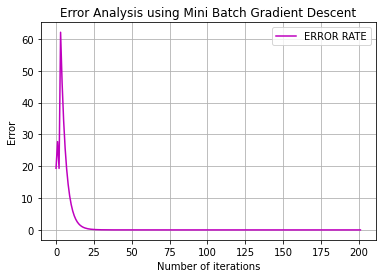

In [185]:
iters = np.arange(202)
plt.plot(iters,error,'-m',label="ERROR RATE")
plt.grid()
plt.title("Error Analysis using Mini Batch Gradient Descent")
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.legend()
plt.show()

In [181]:
mse = 0
for i in range(0,len(data)):
  mse += (data_y[i] - (m*data_x[i]) -c)**2
mse = (1/len(data))*mse
mse

0.011880319630896745

In [182]:
m*0.4 + c

3.709487440833877

In [183]:
for i in range(0,len(data)):
  print(data_x[i],data_y[i],(m*data_x[i] + c))

0.2 3.4 3.233061363257869
0.4 3.8 3.709487440833877
0.6 4.2 4.185913518409886
0.8 4.6 4.662339595985895
1.0 5.0 5.1387656735619025
